In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
train = pd.read_csv('/content/primary_data.csv', on_bad_lines='skip',sep = ';')

# Пропуски

In [ ]:
train = train.drop(columns=['gill-spacing','stem-root','stem-surface','veil-type','veil-color','Spore-print-color'])
train['Cap-surface'] = train['Cap-surface'].fillna('[n]')
train['gill-attachment'] = train['gill-attachment'].fillna('[n]')
train['ring-type'] = train['ring-type'].fillna('[n]')

# Кодирование

In [ ]:
train['season-spring'] = train['season'].apply(lambda x: 's' in x)
train['season-summer'] = train['season'].apply(lambda x: 'u' in x)
train['season-autumn'] = train['season'].apply(lambda x: 'a' in x)
train['season-winter'] = train['season'].apply(lambda x: 'w' in x)
train = train.drop(columns=['season'])
train['season-spring'] = train['season-spring'].astype(int)
train['season-summer'] = train['season-summer'].astype(int)
train['season-autumn'] = train['season-autumn'].astype(int)
train['season-winter'] = train['season-winter'].astype(int)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['family','class','cap-shape','Cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color','has-ring','ring-type','habitat']] = enc.fit_transform(train[['family','class','cap-shape','Cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color','has-ring','ring-type','habitat']])

train[['cap-diameter-min', 'cap-diameter-max']] = train['cap-diameter'].str.extract(r'\[([\d.]+)(?:,\s*([\d.]+))?\]')
train['cap-diameter-min'] = pd.to_numeric(train['cap-diameter-min'])
train['cap-diameter-max'] = pd.to_numeric(train['cap-diameter-max']).fillna(train['cap-diameter-min'])
train = train.drop(columns=['cap-diameter'])

train[['stem-height-min', 'stem-height-max']] = train['stem-height'].str.extract(r'\[([\d.]+)(?:,\s*([\d.]+))?\]')
train['stem-height-min'] = pd.to_numeric(train['stem-height-min'])
train['stem-height-max'] = pd.to_numeric(train['stem-height-max']).fillna(train['stem-height-min'])
train = train.drop(columns=['stem-height'])

train[['stem-width-min', 'stem-width-max']] = train['stem-width'].str.extract(r'\[([\d.]+)(?:,\s*([\d.]+))?\]')
train['stem-width-min'] = pd.to_numeric(train['stem-width-min'])
train['stem-width-max'] = pd.to_numeric(train['stem-width-max']).fillna(train['stem-width-min'])
train = train.drop(columns=['stem-width'])

train = train.drop(columns=['name'])

train.head()

,family,class,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,...,season-spring,season-summer,season-autumn,season-winter,cap-diameter-min,cap-diameter-max,stem-height-min,stem-height-max,stem-width-min,stem-width-max
0,0.0,1.0,22.0,9.0,7.0,0.0,3.0,49.0,36.0,1.0,...,0,1,1,1,10.0,20.0,15,20.0,15.0,20.0
1,0.0,1.0,17.0,13.0,39.0,0.0,3.0,49.0,36.0,1.0,...,0,1,1,0,5.0,10.0,6,10.0,10.0,20.0
2,0.0,1.0,22.0,26.0,13.0,0.0,3.0,49.0,36.0,1.0,...,0,1,1,0,10.0,15.0,10,12.0,10.0,20.0
3,0.0,0.0,22.0,26.0,39.0,1.0,5.0,49.0,36.0,1.0,...,0,1,1,0,5.0,15.0,7,15.0,10.0,25.0
4,0.0,1.0,22.0,19.0,52.0,0.0,5.0,49.0,36.0,1.0,...,0,1,1,0,5.0,12.0,10,12.0,10.0,20.0


In [ ]:
train = train / train.abs().max()
train.head(5)

,family,class,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,...,season-spring,season-summer,season-autumn,season-winter,cap-diameter-min,cap-diameter-max,stem-height-min,stem-height-max,stem-width-min,stem-width-max
0,0.0,1.0,0.846154,0.225,0.106061,0.0,0.375,0.844828,0.9,1.0,...,0.0,1.0,1.0,1.0,0.2,0.40,1.000000,0.571429,0.375,0.20
1,0.0,1.0,0.653846,0.325,0.590909,0.0,0.375,0.844828,0.9,1.0,...,0.0,1.0,1.0,0.0,0.1,0.20,0.400000,0.285714,0.250,0.20
2,0.0,1.0,0.846154,0.650,0.196970,0.0,0.375,0.844828,0.9,1.0,...,0.0,1.0,1.0,0.0,0.2,0.30,0.666667,0.342857,0.250,0.20
3,0.0,0.0,0.846154,0.650,0.590909,1.0,0.625,0.844828,0.9,1.0,...,0.0,1.0,1.0,0.0,0.1,0.30,0.466667,0.428571,0.250,0.25
4,0.0,1.0,0.846154,0.475,0.787879,0.0,0.625,0.844828,0.9,1.0,...,0.0,1.0,1.0,0.0,0.1,0.24,0.666667,0.342857,0.250,0.20


In [ ]:
train['class'].value_counts()

,count
class,
1.0,96
0.0,77


In [ ]:
train.isnull().sum()

,0
family,0
class,0
cap-shape,0
Cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-color,0
has-ring,0


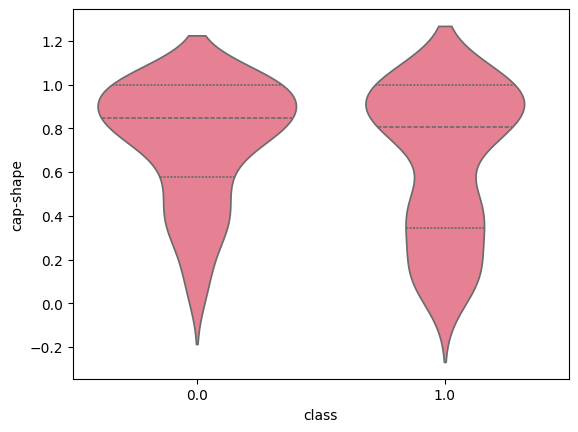

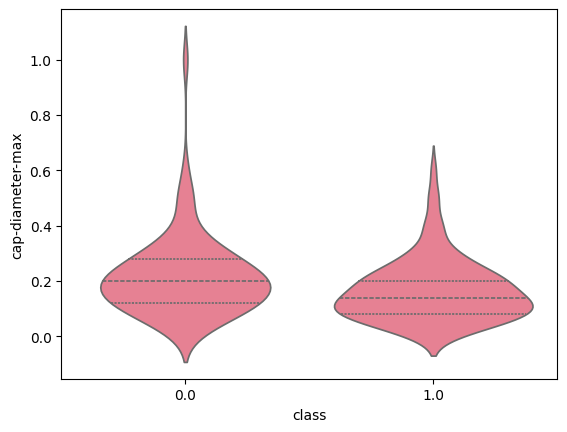

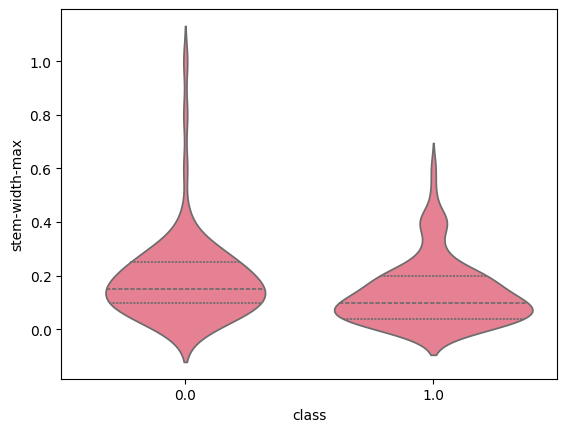

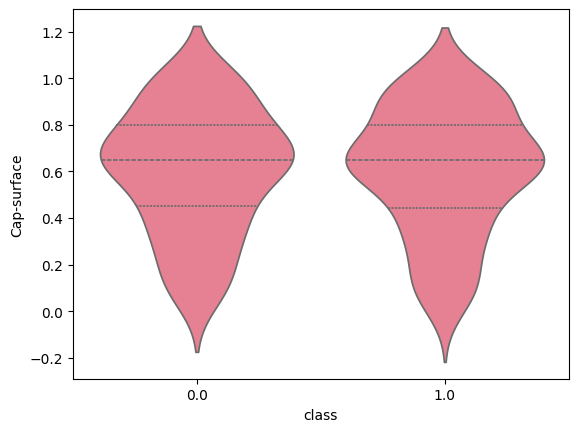

In [ ]:
sns.violinplot(y='cap-shape', x='class', data=train, inner='quartile')
plt.show()
sns.violinplot(y='cap-diameter-max', x='class', data=train, inner='quartile')
plt.show()
sns.violinplot(y='stem-width-max', x='class', data=train, inner='quartile')
plt.show()
sns.violinplot(y='Cap-surface', x='class', data=train, inner='quartile')
plt.show()

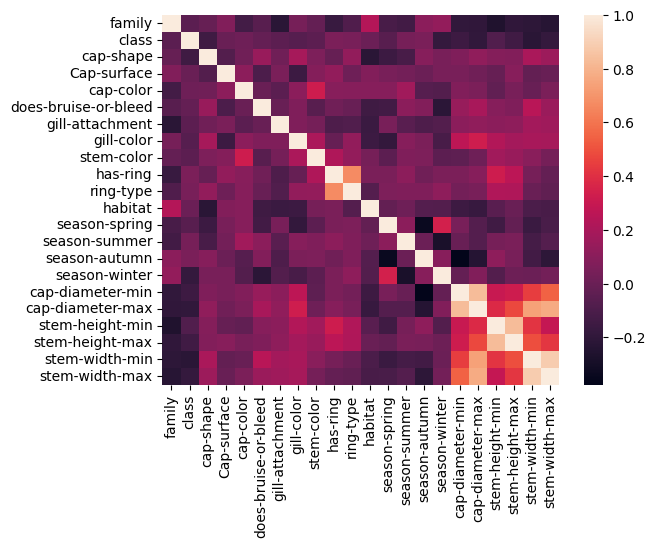

In [ ]:
sns.heatmap(train.corr(numeric_only = True));

# Построение модели

## Разделение данных

In [ ]:
X = train.drop(['class'], axis=1)
y = train['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (173, 21) | y shape: (173,) 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

## Обучение

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.572527 (0.066199)
LDA: 0.536813 (0.060791)
KNN: 0.514835 (0.082894)
CART: 0.536264 (0.084523)
NB: 0.586264 (0.093988)
SVC: 0.564286 (0.052876)


In [ ]:
sk_nb = GaussianNB()
sk_nb.fit(X_train, y_train)
sk_nb_pred_res = sk_nb.predict(X_test)
sk_nb_accuracy = accuracy_score(y_test, sk_nb_pred_res)

print(f'sk NB accuracy: {sk_nb_accuracy}')
print(f'sk NB prediction: {sk_nb_pred_res}')


sk NB accuracy: 0.42857142857142855
sk NB prediction: [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


<Axes: >

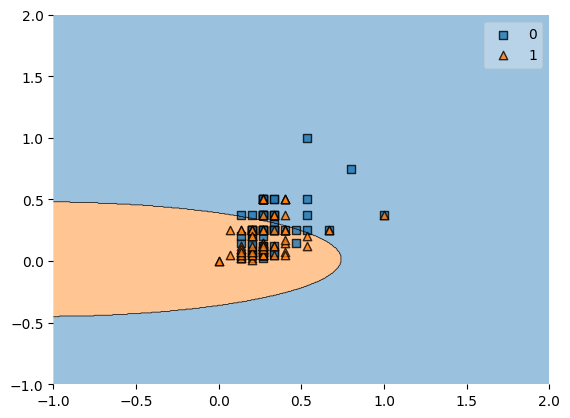

In [ ]:
from mlxtend.plotting import plot_decision_regions
y_s = y_train
X_2d= X_train[['stem-height-min','stem-width-min']].values

y_2d = y_s.values.astype(np.int_)


sk_lda1 = GaussianNB()
sk_lda1.fit(X_2d, y_2d)

plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC

accuracy = metrics.accuracy_score(y_test, sk_nb_pred_res)#Оценим точность классификации.

## Precision e Recall
recall = metrics.recall_score(y_test, sk_nb_pred_res, average="weighted")
precision = metrics.precision_score(y_test, sk_nb_pred_res, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, sk_nb_pred_res, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.43
Precision (confidence when predicting a 1): 0.38
Detail:
              precision    recall  f1-score   support

         0.0       0.25      0.12      0.17        16
         1.0       0.48      0.68      0.57        19

    accuracy                           0.43        35
   macro avg       0.37      0.40      0.37        35
weighted avg       0.38      0.43      0.38        35



   - Модель правильно классифицировала 43% тестовых объектов.
   - Это указывает на низкую общую производительность.


In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.5428571428571428
sk LDA prediction: [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
sk transformed features
[[-1.16311694  0.09395464 -0.46326813 -0.20628588 -3.04681224]]


<Axes: >

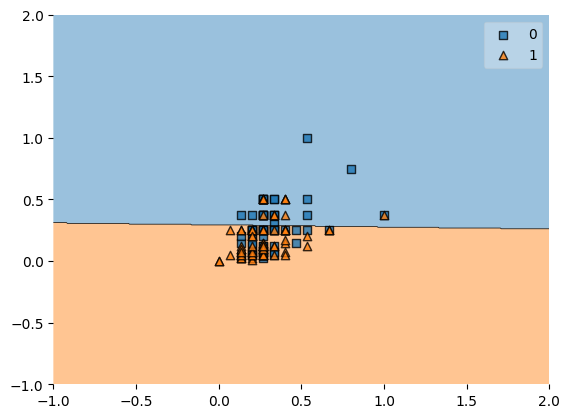

In [ ]:
from mlxtend.plotting import plot_decision_regions
y_s = y_train
X_2d= X_train[['stem-height-min','stem-width-min']].values

y_2d = y_s.values.astype(np.int_)


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC

accuracy = metrics.accuracy_score(y_test, sk_lda_pred_res)#Оценим точность классификации.

## Precision e Recall
recall = metrics.recall_score(y_test, sk_lda_pred_res, average="weighted")
precision = metrics.precision_score(y_test, sk_lda_pred_res, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, sk_lda_pred_res, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.54
Precision (confidence when predicting a 1): 0.53
Detail:
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33        16
         1.0       0.56      0.79      0.65        19

    accuracy                           0.54        35
   macro avg       0.53      0.52      0.49        35
weighted avg       0.53      0.54      0.51        35



   - Модель правильно классифицировала 54% тестовых объектов.
   - Точность немного лучше случайного угадывания для двух классов, но все еще низкая.

